<a href="https://colab.research.google.com/github/kimbaorrr/colab_exercises/blob/main/HMUD/HMUD_Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from mlxtend.data import loadlocal_mnist
import os

In [ ]:
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [ ]:
X = iris.data
Y = iris.target

print(X.shape, Y.shape)

(150, 4) (150,)


In [ ]:
X0 = X[Y == 0, :]
print('Sample from class 0\n', X0[:5, :])

X1 = X[Y == 1, :]
print('Sample from class 1\n', X1[:5, :])

X2 = X[Y == 2, :]
print('Sample from class 2\n', X2[:5, :])

Sample from class 0
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
Sample from class 1
 [[7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.9 1.5]
 [5.5 2.3 4.  1.3]
 [6.5 2.8 4.6 1.5]]
Sample from class 2
 [[6.3 3.3 6.  2.5]
 [5.8 2.7 5.1 1.9]
 [7.1 3.  5.9 2.1]
 [6.3 2.9 5.6 1.8]
 [6.5 3.  5.8 2.2]]


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    X, Y, test_size=.5, random_state=50, stratify=Y
)

print(x_train.shape[0], x_test.shape[0])

75 75


In [ ]:
model = KNeighborsClassifier(n_neighbors=1, p = 2)
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
y_pred = model.predict(x_test)
y_pred

array([2, 1, 0, 1, 2, 1, 1, 2, 0, 2, 2, 2, 0, 1, 2, 1, 1, 1, 0, 1, 2, 1,
       2, 2, 0, 0, 2, 2, 1, 2, 0, 0, 0, 1, 2, 2, 0, 0, 0, 1, 0, 1, 2, 2,
       0, 0, 0, 1, 0, 1, 0, 1, 2, 2, 0, 1, 1, 2, 2, 2, 2, 1, 0, 1, 0, 0,
       1, 0, 1, 2, 0, 1, 1, 0, 2])

In [ ]:
print('Results of 20 test data points')
print('Predicted labels: ', y_pred[20:40])
print('Actual labels   : ', y_test[20:40])

Results of 20 test data points
Predicted labels:  [2 1 2 2 0 0 2 2 1 2 0 0 0 1 2 2 0 0 0 1]
Actual labels   :  [2 1 2 2 0 0 2 2 1 2 0 0 0 1 1 2 0 0 0 1]


In [ ]:
# Đánh giá mô hình

score = accuracy_score(y_test, y_pred)
print('Accuracy: ', round(score*100, 2), '%')


Accuracy:  97.33 %


In [ ]:
# Định nghĩa hàm đo khoảng cách

def sk_weight(distances):
  sigma2 = .5
  return np.exp(-distances**2 / sigma2)

In [ ]:
# Tạo vòng lặp lựa chọn best neighbor value
loop_neighbors = []
for i in range(1, 20):
  model = KNeighborsClassifier(n_neighbors=i, p = 2, weights=sk_weight)
  model.fit(x_train, y_train)
  # Dự đoán
  y_pred = model.predict(x_test)
  # Đánh giá mô hình
  score = accuracy_score(y_test, y_pred)
  loop_neighbors.append(score)
  print(f'Neighbor {i}: ', round(score*100, 2), '%')
print('Best accuracy:', max(loop_neighbors) * 100, '%')

Neighbor 1:  97.33 %
Neighbor 2:  97.33 %
Neighbor 3:  94.67 %
Neighbor 4:  96.0 %
Neighbor 5:  97.33 %
Neighbor 6:  97.33 %
Neighbor 7:  97.33 %
Neighbor 8:  97.33 %
Neighbor 9:  97.33 %
Neighbor 10:  96.0 %
Neighbor 11:  96.0 %
Neighbor 12:  96.0 %
Neighbor 13:  96.0 %
Neighbor 14:  96.0 %
Neighbor 15:  96.0 %
Neighbor 16:  96.0 %
Neighbor 17:  97.33 %
Neighbor 18:  96.0 %
Neighbor 19:  96.0 %
Best accuracy: 97.33333333333334 %


##### 1. Xây dựng mô hình KNN thực hiện bài toán Classification cho cơ sở dữ liệu MNIST.

In [ ]:
%cd /content/drive/MyDrive/AI/ML

/content/drive/MyDrive/AI/ML


In [ ]:
ds_path = 'datasets/MNIST'

In [ ]:
# Đọc dataset

x_train, y_train = loadlocal_mnist(
    images_path=os.path.join(ds_path, 'train-images-idx3-ubyte'),
    labels_path=os.path.join(ds_path,'train-labels-idx1-ubyte')
)
x_test, y_test = loadlocal_mnist(
    images_path=os.path.join(ds_path,'t10k-images-idx3-ubyte'),
    labels_path=os.path.join(ds_path,'t10k-labels-idx1-ubyte')
)

for i in [x_train, y_train, x_test, y_test]:
  print(i.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


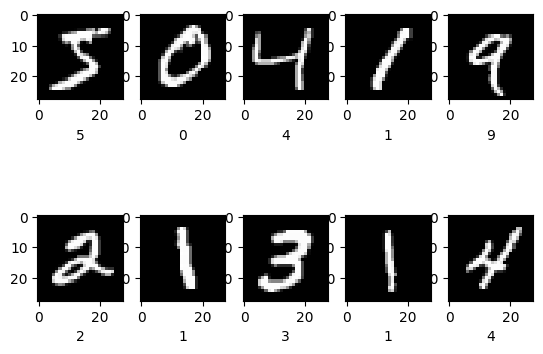

In [ ]:
# Reshape ảnh về dạng 3 chiều (w, h, c)

im_x_train = x_train.reshape(-1, 28, 28, 1)
im_x_test = x_test.reshape(-1, 28, 28, 1)

# In thử 10 ảnh tập Train
for i in range(10):
  plt.subplot(2, 5, i + 1)
  plt.imshow(im_x_train[i], cmap='gray')
  plt.xlabel(y_train[i])
plt.show()

In [ ]:
# Dự đoán ảnh 1000 tập Test
best_acc = []
for weight in ['uniform', sk_weight]:
  best_acc.clear()
  print(weight)
  for i in range(1, 20):
    model = KNeighborsClassifier(n_neighbors=i, p = 2, weights=weight)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test[:1000])
    score = accuracy_score(y_test[:1000], y_pred)
    best_acc.append(score)
    print(f'Neighbor {i}: ', round(score*100, 2), '%')
  print('Best accuracy:', max(best_acc) * 100, '%')


uniform
Neighbor 1:  96.2 %
Neighbor 2:  94.8 %
Neighbor 3:  96.2 %
Neighbor 4:  96.4 %
Neighbor 5:  96.1 %
Neighbor 6:  95.9 %
Neighbor 7:  96.2 %
Neighbor 8:  95.8 %
Neighbor 9:  95.2 %
Neighbor 10:  95.4 %
Neighbor 11:  95.4 %
Neighbor 12:  95.4 %
Neighbor 13:  94.8 %
Neighbor 14:  94.9 %
Neighbor 15:  94.6 %
Neighbor 16:  94.8 %
Neighbor 17:  94.8 %
Neighbor 18:  94.7 %
Neighbor 19:  94.8 %
Best accuracy: 96.39999999999999 %
<function sk_weight at 0x7978b308f7f0>
Neighbor 1:  8.5 %
Neighbor 2:  8.5 %
Neighbor 3:  8.5 %
Neighbor 4:  8.5 %
Neighbor 5:  8.5 %
Neighbor 6:  8.5 %
Neighbor 7:  8.5 %
Neighbor 8:  8.5 %
Neighbor 9:  8.5 %
Neighbor 10:  8.5 %
Neighbor 11:  8.5 %
Neighbor 12:  8.5 %
Neighbor 13:  8.5 %
Neighbor 14:  8.5 %
Neighbor 15:  8.5 %
Neighbor 16:  8.5 %
Neighbor 17:  8.5 %
Neighbor 18:  8.5 %
Neighbor 19:  8.5 %
Best accuracy: 8.5 %


###### 2. Xây dựng mô hình KNN thực hiện bài toán Classification cho cơ sở dữ liệu sau:

In [ ]:
x_data = [
    [0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1],
    [19, 35, 26, 27, 19, 27, 27, 32, 25, 35, 26, 26, 20, 32, 18, 29, 47, 45, 46, 48, 45,47],
    [19000, 20000, 43000, 57000, 76000, 58000, 84000, 1500000, 330000, 65000, 80000, 52000, 86000, 18000, 82000, 80000, 25000, 26000, 28000, 29000, 22000, 49000]
]

y_data = [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1]

x_data = np.array([x_data])
y_data = np.array([y_data])

x_data = x_data.transpose(0, 2, 1)
y_data = y_data.transpose(1, 0)

x_data = x_data.reshape(-1, 3)
print(x_data.shape, y_data.shape)

(22, 3) (22, 1)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    x_data, y_data, test_size=.5, random_state=50, stratify=y_data
)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(11, 3) (11, 1)
(11, 3) (11, 1)


In [ ]:
model = KNeighborsClassifier(n_neighbors=1, p = 2)
model.fit(x_data, y_data)
y_pred = model.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
score = accuracy_score(y_pred, y_test)
print('Accuracy:', round(score*100, 2), '%')

Accuracy: 100.0 %
